In [41]:
import numpy as np
import pandas as pd
from pathlib  import Path

In [42]:
def read_all_versions(parent_path, softwares, templates, name_patterns, cost_functions=[""], dtype=float):
    parent_path = Path(parent_path)
    data = {software: {template: {cost_function: None for cost_function in cost_functions} for template in templates} for software in softwares}

    for software in softwares:
        for template in templates:
            for cost_function in cost_functions:
                data_list = []
                for name_pattern in name_patterns:
                    name = name_pattern(software, template)

                    path = parent_path / software / template / cost_function / "reports" / name
                    # "arrays" /
                    if path.exists():
                        data_list.append(np.loadtxt(path, dtype=dtype))

                if data_list:
                    data[software][template][cost_function] = np.concatenate(data_list)

    return data

In [43]:
def func_fd_passed(s, t):
        return f"{s}_FD_all_fine.txt"

parent_path = Path("/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/diagrams")
softwares = ["flirt"]
templates = ["MNI152NLin2009cAsym_res-01"]
cost_functions = ["normcorr", "corratio", "mutualinfo", "normmi"]
data = read_all_versions(parent_path, softwares, templates, [func_fd_passed], cost_functions=cost_functions)

In [44]:
# Initialize a dictionary to store the standard deviations
std_results = {}

# Traverse the nested dictionary
for software, templates in data.items():
    std_results[software] = {}
    for template, cost_functions in templates.items():
        std_results[software][template] = {}
        for cost_function, array in cost_functions.items():
            # Compute standard deviation
            std = np.std(array, axis=1)
            std_results[software][template][cost_function] = std

In [45]:
std_flirt = std_results['flirt']['MNI152NLin2009cAsym_res-01']
from scipy.stats import shapiro, levene, f_oneway

In [50]:
f_oneway(std_flirt["normcorr"],std_flirt["corratio"],std_flirt["normmi"],std_flirt["mutualinfo"])

F_onewayResult(statistic=100.73232120579381, pvalue=7.723828356175875e-48)

In [51]:
from scipy.stats import kruskal
kruskal(std_flirt["normcorr"],std_flirt["corratio"],std_flirt["normmi"],std_flirt["mutualinfo"])

KruskalResult(statistic=294.4617523541742, pvalue=1.571682629645311e-63)

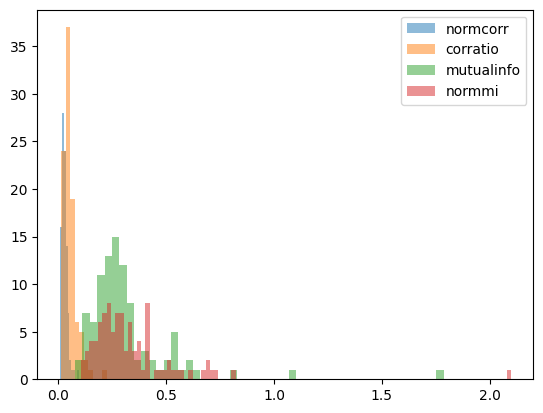

In [49]:
import matplotlib.pyplot as plt
plt.hist(std_flirt["normcorr"], alpha=0.5)
plt.hist(std_flirt["corratio"], alpha=0.5)
plt.hist(std_flirt["normmi"], bins=50, alpha=0.5)
plt.hist(std_flirt["mutualinfo"], bins=100, alpha=0.5)
plt.legend(cost_functions)
plt.show()

In [48]:
np.argmax(std_flirt["mutualinfo"])

19